# Chapter.5 모델 평가와 성능 향상

In [7]:
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn

%matplotlib inline

In [1]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [11]:
# 경고 메세지 제거
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', 'This pattern has match groups')
warnings.filterwarnings('ignore', 'The iterable function was deprecated in Matplotlib')

----------------------------------

In [2]:
X, y = make_blobs(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

logreg = LogisticRegression().fit(X_train, y_train)
print('테스트 세트 점수 : {:.2f}'.format(logreg.score(X_test, y_test)))

테스트 세트 점수 : 0.88


# 5.1 교차 검증

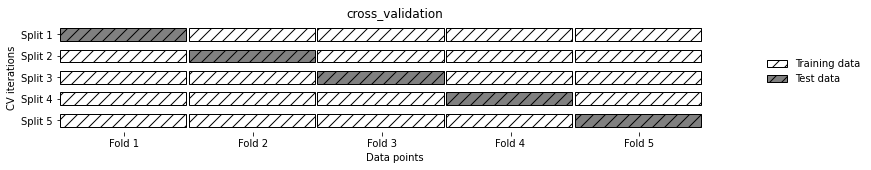

In [8]:
mglearn.plots.plot_cross_validation()

# 5.1.1 scikit-learn의 교차 검증

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [12]:
iris = load_iris()
logreg = LogisticRegression()

scores = cross_val_score(logreg, iris.data, iris.target)
print('교차 검증 점수 : ', scores)

교차 검증 점수 :  [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [15]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=10)
print('교차 검증 점수 : ', scores)

교차 검증 점수 :  [1.         0.93333333 1.         1.         0.93333333 0.93333333
 0.93333333 1.         1.         1.        ]


In [18]:
print('교차 검증 평균 점수 : {:.2f}'.format(scores.mean()))
# score은 여러 값이 저장되어 있는 array이기 때문에 mean을 통해 평균을 구할 수 있다.

교차 검증 평균 점수 : 0.97


In [19]:
from sklearn.model_selection import cross_validate

In [22]:
res = cross_validate(logreg, iris.data, iris.target, cv=5, return_train_score=True)
display(res)

{'fit_time': array([0.02562141, 0.02846336, 0.02093363, 0.02094793, 0.01795793]),
 'score_time': array([0.00102019, 0.00099874, 0.00099254, 0.        , 0.        ]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}

In [24]:
res_df = pd.DataFrame(res)
display(res_df)
print('평균 시간과 점수 : ', res_df.mean())

,fit_time,score_time,test_score,train_score
0,0.025621,0.001020,0.966667,0.966667
1,0.028463,0.000999,1.000000,0.966667
2,0.020934,0.000993,0.933333,0.983333
3,0.020948,0.000000,0.966667,0.983333
4,0.017958,0.000000,1.000000,0.975000


평균 시간과 점수 :  fit_time       0.022785
score_time     0.000602
test_score     0.973333
train_score    0.975000
dtype: float64


# 5.1.3 계층별 k-겹 교차 검증과 그외 전략들

▼ 데이터셋을 나열 순서대로 k개의 폴드로 나누는 것이 항상 좋지는 않다. (의 예시)

In [25]:
from sklearn.datasets import load_iris

iris = load_iris()

print('Iris 레이블 : \n', iris.target)

Iris 레이블 : 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


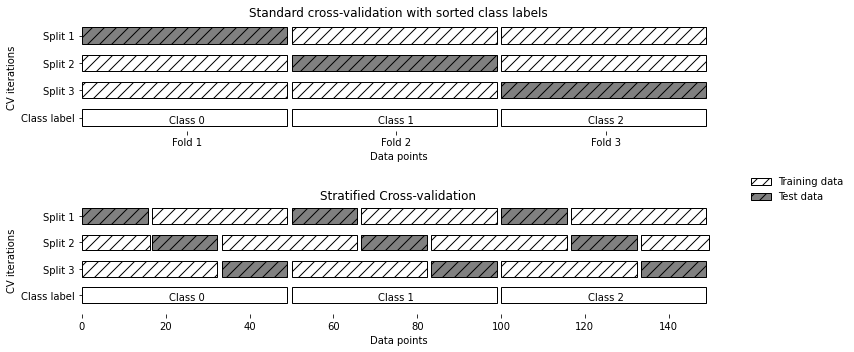

In [26]:
mglearn.plots.plot_stratified_cross_validation()

### 교차 검증 상세 옵션

In [35]:
from sklearn.model_selection import KFold

In [36]:
kfold = KFold(n_splits=5)
print('교차 검증 점수 : \n', cross_val_score(logreg, iris.data, iris.target, cv=kfold))

교차 검증 점수 : 
 [1.         1.         0.86666667 0.93333333 0.83333333]


In [37]:
# irist sets을 삼등분 하면 안되는 이유

kfold = KFold(n_splits=3)
print('교차 검증점수 : \n', cross_val_score(logreg, iris.data, iris.target, cv=kfold))

교차 검증점수 : 
 [0. 0. 0.]


In [39]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print('교차 검증 점수 : ', cross_val_score(logreg, iris.data, iris.target, cv=kfold))

교차 검증 점수 :  [0.98 0.96 0.96]


### LOOCV

In [42]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)    #cv에 적용함
print('교차 검증 분할 횟수 : ',len(scores))
print('평균 정확도 : {:.2f}'.format(scores.mean()))

교차 검증 분할 횟수 :  150
평균 정확도 : 0.97


### 임의 분할 교차 검증

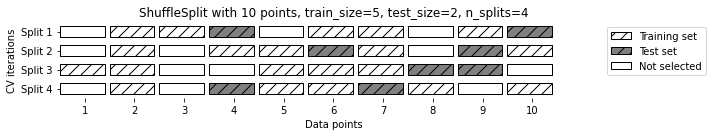

In [43]:
mglearn.plots.plot_shuffle_split()

In [46]:
from sklearn.model_selection import ShuffleSplit

shuffle_split = ShuffleSplit(test_size=0.5, train_size=0.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print('교차 검증 점수 : ', scores)

교차 검증 점수 :  [0.96       0.97333333 0.97333333 0.96       0.93333333 0.93333333
 0.97333333 0.97333333 1.         0.96      ]


### 그룹별 교차 검증

In [55]:
from sklearn.model_selection import GroupKFold

X, y = make_blobs(n_samples=12, random_state=0)

groups = [0,0,0,1,1,1,1,2,2,3,3,3]

scores = cross_val_score(logreg, X, y, groups, cv=KFold(n_splits=3))
print('교차 검증 점수 : \n', scores)

교차 검증 점수 : 
 [0.75 0.75 0.75]


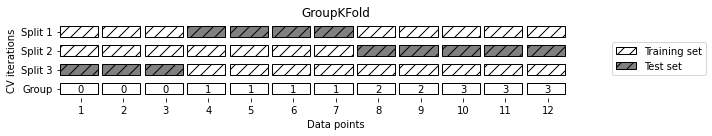

In [56]:
mglearn.plots.plot_group_kfold()

# 5.1.4 (한국어판 부록) 반복 교차 검증

In [59]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [60]:
iris = load_iris()
logreg = LogisticRegression()

In [63]:
from sklearn.model_selection import RepeatedStratifiedKFold

rskfold = RepeatedStratifiedKFold(random_state=42)
scores = cross_val_score(logreg, iris.data, iris.target, cv=rskfold)

print('교차 검증 점수 : \n',scores)
print('교차 검증 평균 점수 : {:.2f}'.format(scores.mean()))

교차 검증 점수 : 
 [1.         0.96666667 0.93333333 1.         0.93333333 0.96666667
 0.96666667 0.93333333 1.         0.96666667 0.93333333 1.
 1.         0.96666667 0.96666667 0.9        1.         1.
 0.93333333 0.96666667 0.93333333 0.96666667 0.96666667 1.
 0.96666667 1.         0.96666667 0.96666667 0.9        1.
 0.96666667 0.96666667 0.96666667 0.96666667 0.93333333 0.96666667
 0.96666667 1.         1.         0.9        0.96666667 1.
 0.9        0.96666667 0.96666667 0.9        0.96666667 0.96666667
 1.         0.96666667]
교차 검증 평균 점수 : 0.96


# 5.2 그리드 서치

# 5.2.1 간단한 그리드 서치

In [64]:
from sklearn.svm import SVC

In [90]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

print('훈련 세트의 크기 : {} \n테스트 세트의 크기 : {}'.format(X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100] : 
    for C in [0.001, 0.01, 0.1, 1, 10, 100] :
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_test, y_test)
        
        if score > best_score:
            best_score = score
best_parameters = {'C':C, 'gamma':gamma}
            
print('최고 점수 : {:.3f}'.format(best_score))
print('최적 매개변수 : ', best_parameters)

훈련 세트의 크기 : 112 
테스트 세트의 크기 : 38
최고 점수 : 0.974
최적 매개변수 :  {'C': 100, 'gamma': 100}


# 5.2.2 매개변수 과대적합과 검증 세트

In [91]:
from sklearn.svm import SVC

In [92]:
X_trainval, X_test, y_trainval, y_tset = train_test_split(iris.data, iris.target, random_state=0)

X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=0)

print('훈련 세트의 크기: {}, 검증 세트의 크기 : {}, 테스트 세트의 크기 : {}'.format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

훈련 세트의 크기: 84, 검증 세트의 크기 : 28, 테스트 세트의 크기 : 38


In [94]:
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100] :
    for C in [0.001, 0.01, 0.1, 1, 10, 100] :
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_valid, y_valid)
        
        if score > best_score :
            best_score = score
            best_parameters = {'C':C, 'gamma':gamma}

svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)

print('검증 세트에서 최고 점수 : {:.3f}'.format(best_score))
print('최적 매개변수 : ', best_parameters)
print('최적 매개변수에서 테스트 세트 점수 : {:.3f}'.format(test_score))

검증 세트에서 최고 점수 : 1.000
최적 매개변수 :  {'C': 100, 'gamma': 0.001}
최적 매개변수에서 테스트 세트 점수 : 0.974


# 5.2.3 교차 검증을 사용한 그리드 서치

In [97]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100] :
    for C in [0.001, 0.01, 0.1, 1, 10, 100] :
        svm = SVC(gamma=gamma, C=C)
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5) #교차 검증 적용
        score = np.mean(scores)
        
        if score>best_score :
            best_score = score
            best_parameters = {'C':C, 'gamma':gamma}
            
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=100, gamma=0.001)

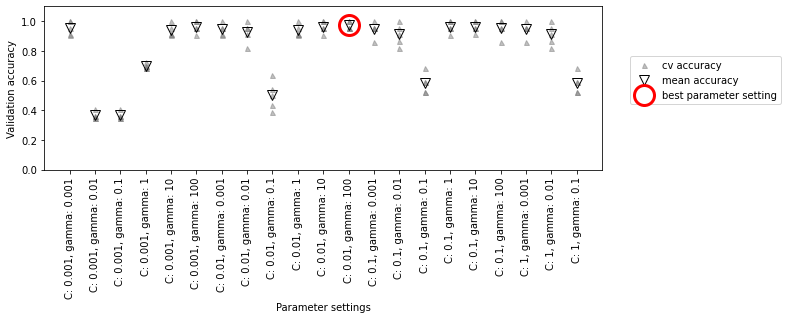

In [99]:
mglearn.plots.plot_cross_val_selection()

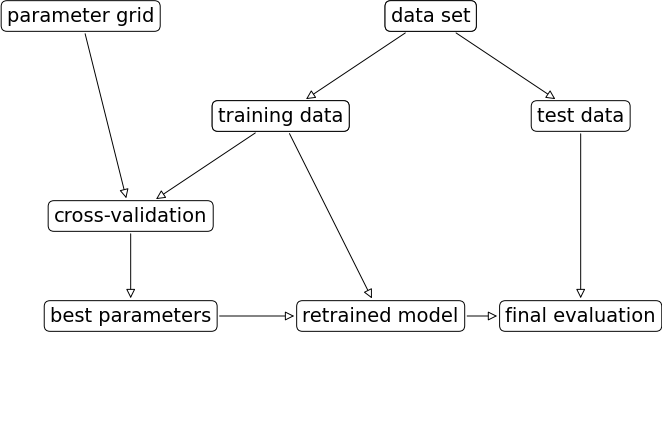

In [101]:
mglearn.plots.plot_grid_search_overview()

In [102]:
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100],
             'gamma' : [0.001, 0.01, 0.1, 1, 10, 100]}
print('매개변수 그리드 : \n', param_grid)

매개변수 그리드 : 
 {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [103]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

In [105]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [106]:
print('테스트 세트 점수 : {:.2f}'.format(grid_search.score(X_test, y_test)))

테스트 세트 점수 : 0.97


In [107]:
print('최적 매개변수 : ', grid_search.best_params_)
print('최고 교차 검증 점수 : {:.2f}'.format(grid_search.best_score_))

최적 매개변수 :  {'C': 10, 'gamma': 0.1}
최고 교차 검증 점수 : 0.97


In [108]:
print('최고 성능 모델 : \n', grid_search.best_estimator_)

최고 성능 모델 : 
 SVC(C=10, gamma=0.1)


### 교차 검증 결과 분석

In [109]:
import pandas as pd
pd.set_option('display.max_columns', None)
results = pd.DataFrame(grid_search.cv_results_)
display(np.transpose(results.head()))

,0,1,2,3,4
mean_fit_time,0.000950289,0.000702143,0.000771332,0.000985813,0.000798321
std_fit_time,0.000635961,0.000500155,0.00040339,0.00063603,0.000399203
mean_score_time,0.000444841,0.000315571,0.000305748,0.000586891,0.000175476
std_score_time,0.000459129,0.000407621,0.000393973,0.000479432,0.000350952
param_C,0.001,0.001,0.001,0.001,0.001
param_gamma,0.001,0.01,0.1,1,10
params,"{'C': 0.001, 'gamma': 0.001}","{'C': 0.001, 'gamma': 0.01}","{'C': 0.001, 'gamma': 0.1}","{'C': 0.001, 'gamma': 1}","{'C': 0.001, 'gamma': 10}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split2_test_score,0.363636,0.363636,0.363636,0.363636,0.363636


In [117]:
scores = np.array(results.mean_test_score).reshape(6,6)

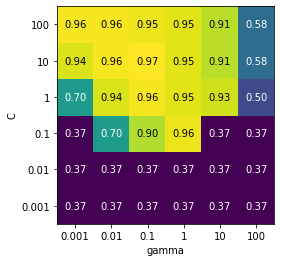

In [124]:
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'], ylabel='C', yticklabels=param_grid['C'], cmap='viridis')

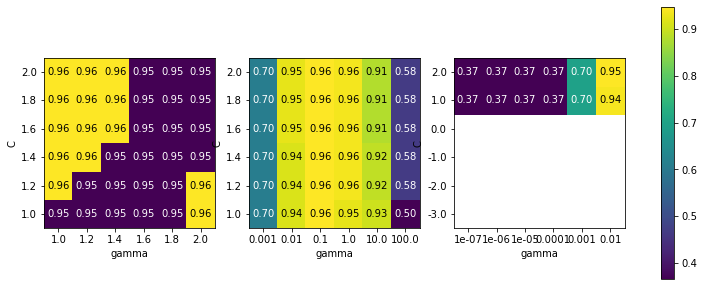

In [146]:
fig, axes = plt.subplots(1,3, figsize=(13,5))

param_grid_linear = {'C':np.linspace(1,2,6),
                    'gamma':np.linspace(1,2,6)}
param_grid_one_log = {'C':np.linspace(1,2,6),
                    'gamma':np.logspace(-3,2,6)}
param_grid_one_range = {'C':np.linspace(-3,2,6),
                    'gamma':np.logspace(-7,-2,6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log, param_grid_one_range], axes) :
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6,6)
    
    score_image = mglearn.tools.heatmap(scores, xlabel='gamma', ylabel='C',
                                       xticklabels=param_grid['gamma'], yticklabels=param_grid['C'], 
                                        cmap='viridis', ax=ax)
    
plt.colorbar(score_image, ax=axes.tolist())

In [151]:
param_grid = [{'kernel':['rbf'],
              'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma':[0.001, 0.01, 0.1, 1, 10, 100]},
             {'kernel':['linear'],
              'C': [0.001, 0.01, 0.1, 1, 10, 100]}]

print('그리드 목록 : \n', param_grid)

그리드 목록 : 
 [{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [154]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)

print('최적 파라미터 : ', grid_search.best_params_)
print('최고 교차 검증 점수 : {:.2f}'.format(grid_search.best_score_))

최적 파라미터 :  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
최고 교차 검증 점수 : 0.97


In [157]:
results = pd.DataFrame(grid_search.cv_results_)
results.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.000399303,0.000499535,0.000605154,0.000592661,0.000993586,0.000792122,0.00059886,0.00060668,0.0004004,0.000399351,0.000399971,0.000796604,0.000598717,0.000399017,0.000398636,0.000600433,0.000399733,0.000798941,0.000597382,0.000397444,0,0.000391436,0.0010016,0.000797033,0.000397873,0.00019331,0.00039916,0.000398207,0.000599718,0.000798845,0.000199604,0.000798035,0,0.000598764,0.000798368,0.000783205,0.000397968,0.000199509,0.000798273,0,0.000598478,0
std_fit_time,0.000489045,0.000445906,0.000494285,0.000484065,1.65749e-05,0.000396155,0.000488971,0.000495511,0.000490389,0.000489104,0.000489865,0.000398308,0.00048886,0.000488717,0.000488228,0.00049026,0.00048957,0.000399486,0.000487769,0.000486768,0,0.00047953,5.35036e-06,0.000398521,0.000487293,0.00038662,0.00048887,0.000487702,0.000489678,0.000399429,0.000399208,0.000399039,0,0.00048889,0.000399199,0.000392582,0.00048741,0.000399017,0.000399167,0,0.000488665,0
mean_score_time,0.000389671,0.00039897,0,0,0.000597,0.000199842,0,0.000199509,0.000397778,0.00039897,0.000198984,0.000199127,0,0.000405884,0.00019803,0.00019989,0.000398159,0.000198507,0.000199652,0.000200415,0.000398827,0.000405407,0,0.00019927,0.000200558,0.00019865,0.000398827,0.000199652,0.00039978,0.000198507,0.000398827,0,0.00019846,0,0.000199604,0.000199461,0.000198841,0.000399017,0,0.000199509,0.000398731,0
std_score_time,0.000477481,0.000488636,0,0,0.001194,0.000399685,0,0.000399017,0.000487185,0.000488636,0.000397968,0.000398254,0,0.000497262,0.000396061,0.00039978,0.000487643,0.000397015,0.000399303,0.000400829,0.000488483,0.000496623,0,0.00039854,0.000401115,0.000397301,0.000488463,0.000399303,0.000489632,0.000397015,0.000488464,0,0.000396919,0,0.000399208,0.000398922,0.000397682,0.000488694,0,0.000399017,0.000488346,0
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,0.01,0.01,0.1,0.1,0.1,0.1,0.1,0.1,1,1,1,1,1,1,10,10,10,10,10,10,100,100,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 100, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 1, 'gamma': 1, 'kernel': 'rbf'}","{'C': 1, 'gamma': 10, 'kernel': 'rbf'}","{'C': 1, 'gamma': 100, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 10, 'gamma': 1, 'kernel': 'rbf'}","{'C': 10, 'gamma': 10, 'kernel': 'rbf'}","{'C': 10, 'gamma': 100, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}"

# 5.3 평가 지표와 측정

# 5.3.2 이진 분류의 평가 지표

#### 불균형 데이터셋

In [160]:
from sklearn.datasets import load_digits

In [166]:
digits = load_digits()
y = digits.target==9   #digits.target의 값이 0~8일때는 False, 9일때는 True를 갖도록 설정

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

In [169]:
from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)

print('예측된 레이블의 레이블 : ',np.unique(pred_most_frequent))
print('테스트 점수 : {:.2f}'.format(dummy_majority.score(X_test, y_test)))

예측된 레이블의 레이블 :  [False]
테스트 점수 : 0.90


In [175]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print('테스트 점수 : {:.2f}'.format(tree.score(X_test, y_test)))

테스트 점수 : 0.92


In [178]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print('dummy 최고 점수 : {:.2f}'.format(dummy.score(X_test, y_test)))

logreg = LogisticRegression().fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print('logreg 최고 점수 : {:.2f}'.format(logreg.score(X_test, y_test)))

dummy 최고 점수 : 0.82
logreg 최고 점수 : 0.98


#### 오차 행렬

In [176]:
from sklearn.metrics import confusion_matrix

In [179]:
confusion = confusion_matrix(y_test, pred_logreg)
print('오차 행렬 \n', confusion)

오차 행렬 
 [[399   4]
 [  7  40]]


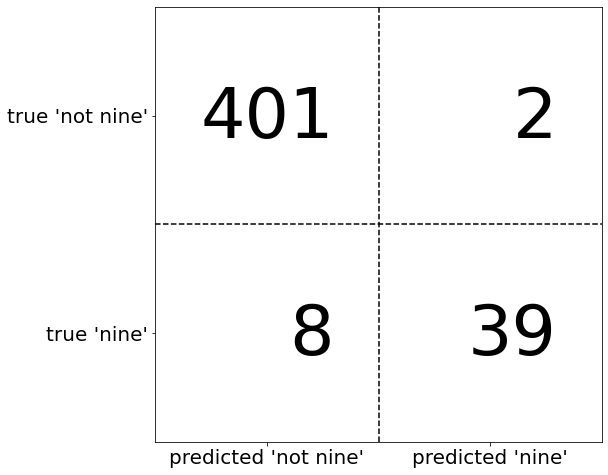

In [180]:
mglearn.plots.plot_confusion_matrix_illustration()

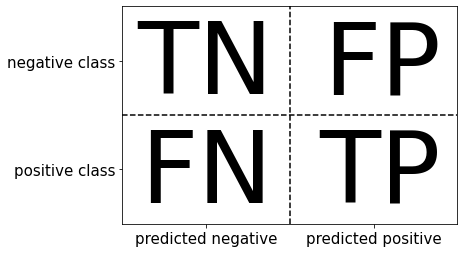

In [181]:
mglearn.plots.plot_binary_confusion_matrix()